This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

In [445]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [446]:
df = pd.read_csv(r"C:\Users\HP\Desktop\baseball.csv",engine='python')

In [447]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [448]:
df.shape

(30, 17)

Extract Features---

#Features and target should not have null values
# Features should be numeric in nature
#Features should be of the type array/ dataframe
# Features should have some rows and some columns
#Split the dataset into training and testing datasets
# Features should be on the same scale
#Train the model on the training dataset
#Test the model on the testing dataset

In [450]:
df_pd = pd.DataFrame(df)

In [451]:
df_pd.rename(columns ={'W':'WIN','R':'RUNS','AB':'AT_BATS','H':'HITS','2B':'DOUBLES','3B':'TRIPLES','HR':'HOMMERUNS','BB':'WALKS'},inplace=True)

In [452]:
df.head()

,WIN,RUNS,AT_BATS,HITS,DOUBLES,TRIPLES,HOMMERUNS,WALKS,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [453]:
df_pd.rename(columns ={'SO':'STRIKEOUTS','SB':'STOLEN_BASES','RA':'RUNS_ALLOWED','ER':'EARNED_RUNS','ERA':'EARNES_RUNS_AVERAGE','CG':'COMPLETE_GAME','SHO':'SHUTOUTS','SV':'SAVES','E':'ERRORS'},inplace=True)
df.head()

,WIN,RUNS,AT_BATS,HITS,DOUBLES,TRIPLES,HOMMERUNS,WALKS,STRIKEOUTS,STOLEN_BASES,RUNS_ALLOWED,EARNED_RUNS,EARNES_RUNS_AVERAGE,COMPLETE_GAME,SHUTOUTS,SAVES,ERRORS
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm 
#that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.
#There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

#Input and Output features:
#Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors
# Output: Number of predicted wins (W)

MORE INFORMATION OF DATA

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WIN                  30 non-null     int64  
 1   RUNS                 30 non-null     int64  
 2   AT_BATS              30 non-null     int64  
 3   HITS                 30 non-null     int64  
 4   DOUBLES              30 non-null     int64  
 5   TRIPLES              30 non-null     int64  
 6   HOMMERUNS            30 non-null     int64  
 7   WALKS                30 non-null     int64  
 8   STRIKEOUTS           30 non-null     int64  
 9   STOLEN_BASES         30 non-null     int64  
 10  RUNS_ALLOWED         30 non-null     int64  
 11  EARNED_RUNS          30 non-null     int64  
 12  EARNES_RUNS_AVERAGE  30 non-null     float64
 13  COMPLETE_GAME        30 non-null     int64  
 14  SHUTOUTS             30 non-null     int64  
 15  SAVES                30 non-null     int64

In [457]:
df.isna().sum()

WIN                    0
RUNS                   0
AT_BATS                0
HITS                   0
DOUBLES                0
TRIPLES                0
HOMMERUNS              0
WALKS                  0
STRIKEOUTS             0
STOLEN_BASES           0
RUNS_ALLOWED           0
EARNED_RUNS            0
EARNES_RUNS_AVERAGE    0
COMPLETE_GAME          0
SHUTOUTS               0
SAVES                  0
ERRORS                 0
dtype: int64

THERE IS NO NULL VALUES IN ANY COLUMN OF DATASET.

In [458]:
# Let's see the correlation between different variables.

In [459]:
df.describe()

,WIN,RUNS,AT_BATS,HITS,DOUBLES,TRIPLES,HOMMERUNS,WALKS,STRIKEOUTS,STOLEN_BASES,RUNS_ALLOWED,EARNED_RUNS,EARNES_RUNS_AVERAGE,COMPLETE_GAME,SHUTOUTS,SAVES,ERRORS
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [460]:
df.corr()

,WIN,RUNS,AT_BATS,HITS,DOUBLES,TRIPLES,HOMMERUNS,WALKS,STRIKEOUTS,STOLEN_BASES,RUNS_ALLOWED,EARNED_RUNS,EARNES_RUNS_AVERAGE,COMPLETE_GAME,SHUTOUTS,SAVES,ERRORS
WIN,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
RUNS,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AT_BATS,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
HITS,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
DOUBLES,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
TRIPLES,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HOMMERUNS,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
WALKS,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
STRIKEOUTS,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
STOLEN_BASES,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


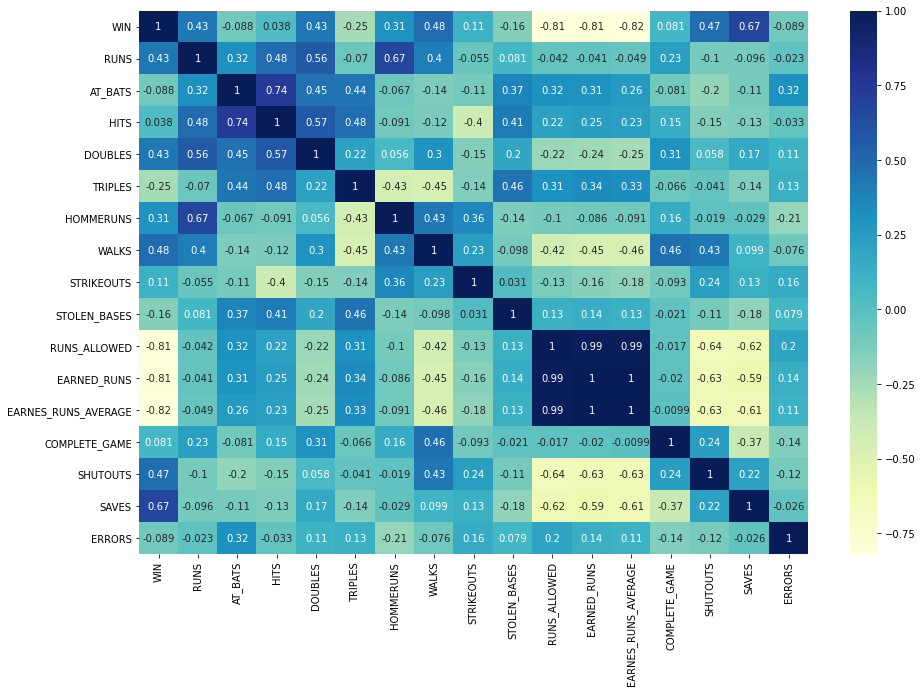

In [461]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

correlated features are as follows:
Runs_Allowed
Earned_Runs
Earned_Runs_Average

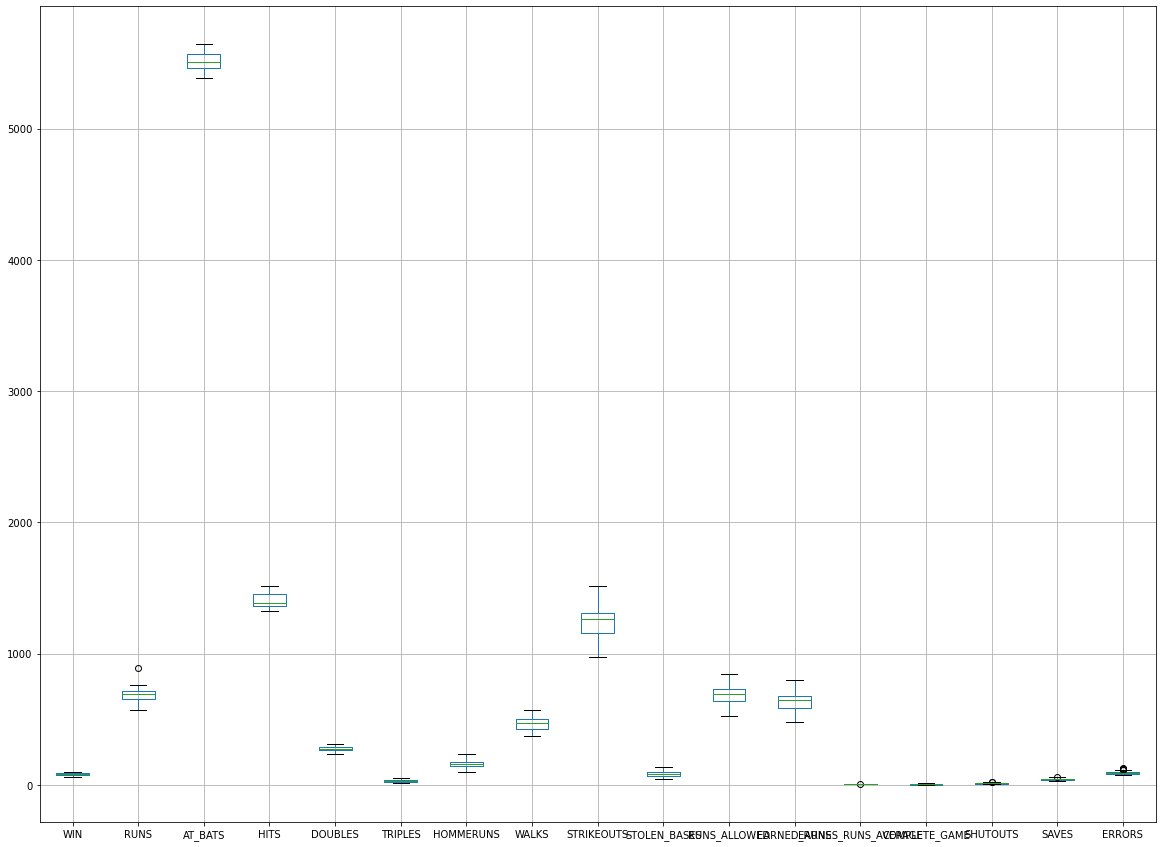

In [462]:
cols = df.columns.tolist()
#Checking for Detecting Outliers
plt.subplots(figsize=(20,15))
boxplot = df.boxplot(column=cols)

In [463]:
df.skew()

WIN                    0.047089
RUNS                   1.200786
AT_BATS                0.183437
HITS                   0.670254
DOUBLES               -0.230650
TRIPLES                0.129502
HOMMERUNS              0.516441
WALKS                  0.158498
STRIKEOUTS            -0.156065
STOLEN_BASES           0.479893
RUNS_ALLOWED           0.045734
EARNED_RUNS            0.058710
EARNES_RUNS_AVERAGE    0.053331
COMPLETE_GAME          0.736845
SHUTOUTS               0.565790
SAVES                  0.657524
ERRORS                 0.890132
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


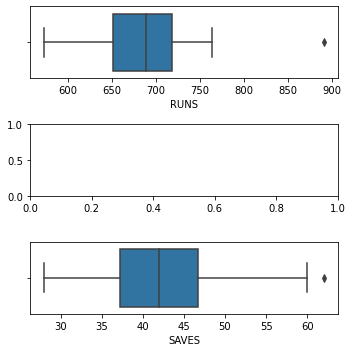

In [464]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['RUNS'], ax = axs[0])
plt3 = sns.boxplot(df['SAVES'], ax = axs[2])
plt.tight_layout()

# outliers are fine with the dataset as if we will remove data, then it will be data loss and model wont predict good.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


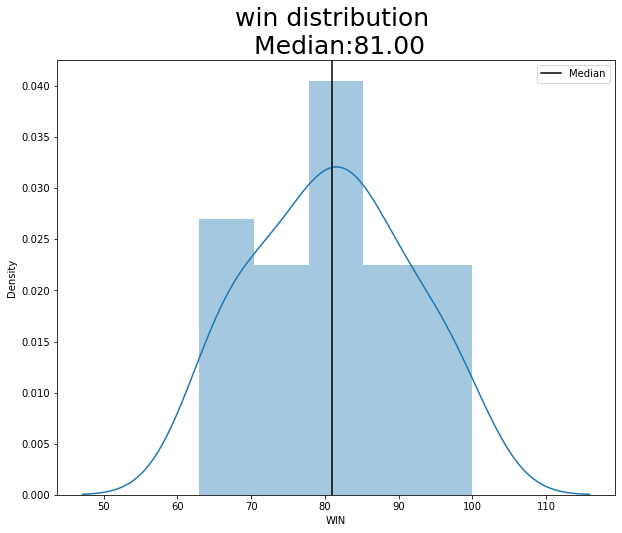

In [466]:
plt.figure(figsize=(10,8))
sns.distplot(df['WIN'])
plt.title('win distribution \n Median:{0:.2f}'.format(df['WIN'].median()),size=25)
plt.axvline(df['WIN'].median(),color='black',label='Median')
plt.legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNS', ylabel='WIN'>

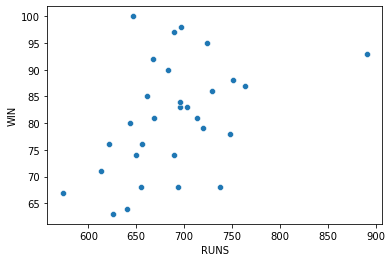

In [467]:
sns.scatterplot(df.RUNS,df.WIN)

In [468]:
#We can say there is some linearity between Runs features and the target ..but noting significant.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT_BATS', ylabel='WIN'>

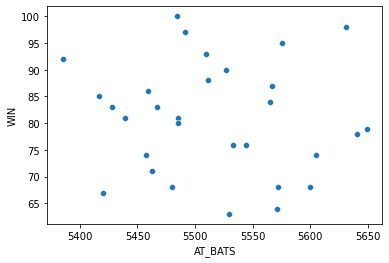

In [469]:
sns.scatterplot(df.AT_BATS,df.WIN)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNS_ALLOWED', ylabel='RUNS'>

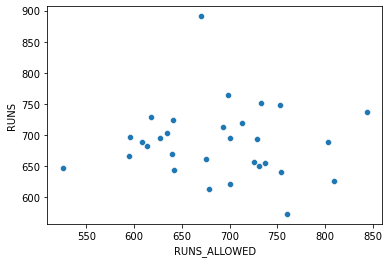

In [470]:
# runs alllowed vs runs scores
sns.scatterplot(df.RUNS_ALLOWED,df.RUNS)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ERRORS', ylabel='WIN'>

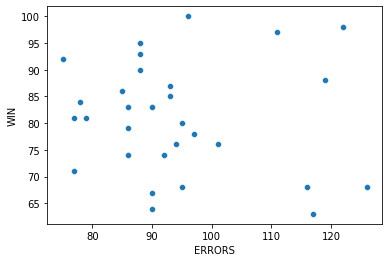

In [471]:
# wins vs erros
sns.scatterplot(df.ERRORS,df.WIN)


In [472]:
# we can see that the runs feature has an invalid skew.
# We can address is using the some transformation on the feature
# Let's try log transformation
np.log(df+1).skew()
df = np.log(df + 1)

In [473]:
#as our data isnt scaled so will use minmax scaler after splitting

In [474]:
# Split the features and the target variables into X and y respectively.
X = df.drop(labels=['WIN'],axis=1)
y = df.WIN

In [475]:

# check the shapes
X.shape,y.shape

((30, 16), (30,))

In [476]:
X.head()

,RUNS,AT_BATS,HITS,DOUBLES,TRIPLES,HOMMERUNS,WALKS,STRIKEOUTS,STOLEN_BASES,RUNS_ALLOWED,EARNED_RUNS,EARNES_RUNS_AVERAGE,COMPLETE_GAME,SHUTOUTS,SAVES,ERRORS
0,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,6.464588,6.400257,1.553925,1.098612,2.197225,4.043051,4.488636
1,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,6.552508,6.483107,1.623341,1.098612,2.564949,3.828641,4.465908
2,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,6.463029,6.371612,1.541159,2.484907,2.397895,3.663562,4.382027
3,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,6.553933,6.467699,1.605430,2.079442,2.302585,3.637586,4.624973
4,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,6.689599,6.616065,1.729884,2.079442,2.564949,3.583519,4.465908


Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the WIN column.


Train Test Split¶
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
# train _test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state = 42)

In [478]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((23, 16), (23,), (7, 16), (7,))

In [479]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [480]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [481]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [482]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

Predictions from our Model

In [483]:
print(lin_reg.intercept_)

4.394240378898836


In [484]:
pred = lin_reg.predict(X_test)

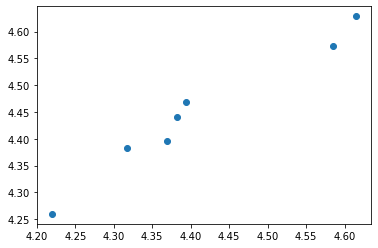

In [485]:
plt.scatter(y_test, pred)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


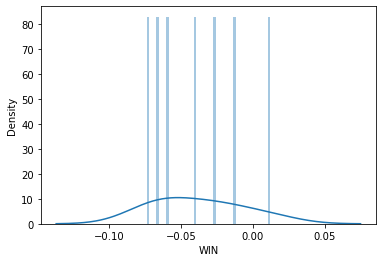

In [486]:
sns.distplot((y_test - pred), bins=50);

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [487]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.041670622984862425
MSE: 0.00228434077791545
RMSE: 0.04779477772639444
R2 Square 0.8669446552395621
Train set evaluation:
_____________________________________
MAE: 0.015762474460549993
MSE: 0.0003481552057590438
RMSE: 0.01865891759344694
R2 Square 0.9777322667368283


In [488]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786


In [489]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.0636198542506831
MSE: 0.006426796622362214
RMSE: 0.08016730394844405
R2 Square 0.6256602129766504
Train set evaluation:
_____________________________________
MAE: 0.06305847827816118
MSE: 0.005880470121223938
RMSE: 0.07668422341801433
R2 Square 0.623889753893005


In [490]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786
1,Ridge Regression,0.063620,0.006427,0.080167,0.625660,-11.160986


In [491]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.0003, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.06571337431296888
MSE: 0.006256917014178654
RMSE: 0.07910067644577165
R2 Square 0.6355551419877493
Train set evaluation:
_____________________________________
MAE: 0.032738310919232586
MSE: 0.0016513020211621427
RMSE: 0.04063621563534359
R2 Square 0.8943840208736569


In [492]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786
1,Ridge Regression,0.063620,0.006427,0.080167,0.625660,-11.160986
2,Lasso Regression,0.065713,0.006257,0.079101,0.635555,-32.239873


In [493]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.0937176725781733
MSE: 0.015331677487005105
RMSE: 0.12382115121014303
R2 Square 0.1069801609675538
Train set evaluation:
_____________________________________
MAE: 0.10208419136668131
MSE: 0.014345132810746728
RMSE: 0.11977116852876876
R2 Square 0.0824965826432068


In [494]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786
1,Ridge Regression,0.063620,0.006427,0.080167,0.625660,-11.160986
2,Lasso Regression,0.065713,0.006257,0.079101,0.635555,-32.239873
3,Elastic Net Regression,0.093718,0.015332,0.123821,0.106980,-32.239873


In [495]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.06468061811660039
MSE: 0.005606665688494867
RMSE: 0.074877671494878
R2 Square 0.6734301452080396
Train set evaluation:
_____________________________________
MAE: 8.881784197001252e-16
MSE: 7.888609052210118e-31
RMSE: 8.881784197001252e-16
R2 Square 1.0


In [496]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786
1,Ridge Regression,0.063620,0.006427,0.080167,0.625660,-11.160986
2,Lasso Regression,0.065713,0.006257,0.079101,0.635555,-32.239873
3,Elastic Net Regression,0.093718,0.015332,0.123821,0.106980,-32.239873
4,Polynomail Regression,0.064681,0.005607,0.074878,0.673430,0.000000


In [497]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.0937176725781733
MSE: 0.015331677487005105
RMSE: 0.12382115121014303
R2 Square 0.1069801609675538
Train set evaluation:
_____________________________________
MAE: 0.10208419136668131
MSE: 0.014345132810746728
RMSE: 0.11977116852876876
R2 Square 0.0824965826432068


In [498]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.06128103943758223
MSE: 0.006207355906787908
RMSE: 0.07878677494851473
R2 Square 0.6384419136526156
Train set evaluation:
_____________________________________
MAE: 0.02830444272156617
MSE: 0.0011784636359962418
RMSE: 0.0343287581481801
R2 Square 0.924626392273814


In [499]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786
1,Ridge Regression,0.063620,0.006427,0.080167,0.625660,-11.160986
2,Lasso Regression,0.065713,0.006257,0.079101,0.635555,-32.239873
3,Elastic Net Regression,0.093718,0.015332,0.123821,0.106980,-32.239873
4,Polynomail Regression,0.064681,0.005607,0.074878,0.673430,0.000000
5,Random Forest Regressor,0.061281,0.006207,0.078787,0.638442,0.000000


In [500]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08438536222342385
MSE: 0.009074410469741081
RMSE: 0.09525970013463764
R2 Square 0.4714454055095383
Train set evaluation:
_____________________________________
MAE: 0.0010788775854443523
MSE: 1.19510256439952e-06
RMSE: 0.001093207466311642
R2 Square 0.9999235621794936


In [501]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.041671,0.002284,0.047795,0.866945,-3.626786
1,Ridge Regression,0.063620,0.006427,0.080167,0.625660,-11.160986
2,Lasso Regression,0.065713,0.006257,0.079101,0.635555,-32.239873
3,Elastic Net Regression,0.093718,0.015332,0.123821,0.106980,-32.239873
4,Polynomail Regression,0.064681,0.005607,0.074878,0.673430,0.000000
5,Random Forest Regressor,0.061281,0.006207,0.078787,0.638442,0.000000
6,SVM Regressor,0.084385,0.009074,0.095260,0.471445,0.000000


<AxesSubplot:ylabel='Model'>

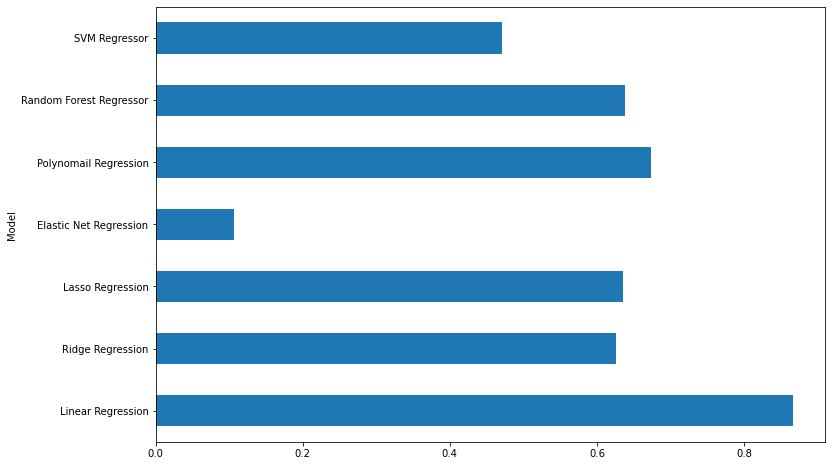

In [502]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [503]:
#we discovered the best model which is linear regression algorithm for machine learning

In [504]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [505]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))

In [506]:
#We can see that the Ensemble Methods are doing bad on this model as one of the main reason for that is Very Less Data and
#Too Many Features with respect to to the number of samples and best model is LINEAR REGRESSION HERE.

In [507]:
# Best model

best_model = LinearRegression()
best_model.fit(X_train,y_train)

LinearRegression()

In [508]:
train_n_ret_scores(LinearRegression())

MSE: 0.002284340777915448
R2_Score 0.8669446552395622


In [509]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'BaseBall.pkl')

['BaseBall.pkl']

Summary
In this notebook you discovered the linear regression algorithm for machine learning.

You covered a lot of ground including:

The common linear regression models (Ridge, Lasso, ElasticNet, ...).
The representation used by the model.
Learning algorithms used to estimate the coefficients in the model.
Rules of thumb to consider when preparing data for use with linear regression.
How to evaluate a linear regression model.